In [ ]:
%pylab inline
import sys
sys.path = ['D:\Coding\py\py3\experiments\easyEEG2\\']+sys.path 
# import importlib
# importlib.reload(easyEEG)

import easyEEG
# easyEEG.reload()

# import os
import mne

# mne.set_log_level('ERROR')

# path=r'D:\lab\6_char_chunking\\'
# subjIDs = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,18,19,20,21,22,23]
# files = [f'{file}.vhdr' for file in ['05','06', '07','08','09','10','11', '12','13',
#                             '14','15','16','17','18','18_2','19','20','21','22','23']]

# raw_all = easyEEG.io.load_raw(path=path, files=files, subjIDs=subjIDs).\
#                 preprocess(filter_range=(0.5,30), DeWave=True, DeEOG=['TP10','FT10','Fp1','TP9'], drop_channels=['TP10','FT10','TP9'],raw_reference='Cz', new_reference='average')
path=r'D:\lab\6_char_chunking\0.5dewave_1\\'
raw_all = easyEEG.io.load_raw(path=path, preload=True)

In [ ]:
import importlib
importlib.reload(easyEEG)
easyEEG.reload()
events={'Tt':'Tt', 'Tf':'Tf', 'Ft':'Ft', 'Ff':'Ff'}
epochs = raw_all.epoching(events=events, epoch_range=(-0.2, 1))on

## ERP

Cz


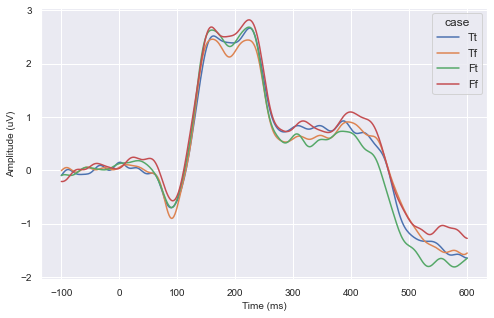

Fz


<Figure size 432x288 with 0 Axes>

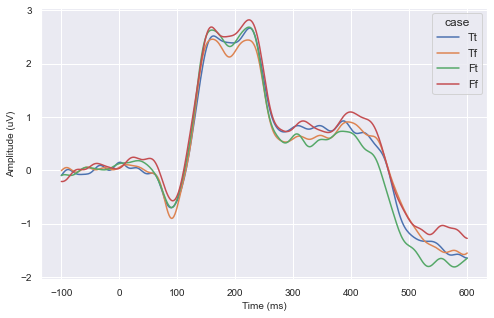

Pz


<Figure size 432x288 with 0 Axes>

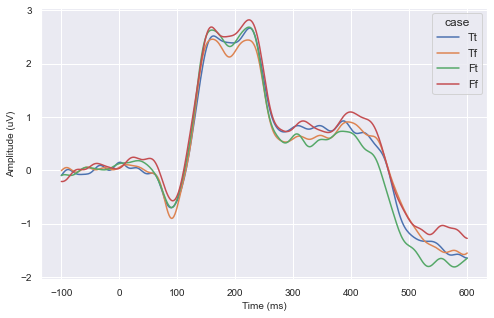

<Figure size 432x288 with 0 Axes>

In [449]:
easyEEG.reload()
for ch in ['Cz','Fz','Pz']:
    print(ch)
    script = {'condition': 'Tt,Tf,Ft,Ff',
              'channel': 'Cz',
              'time': '-100~600',}

    res = epochs.extract(script).ERP()
    res.plot(dict(ci=None))

In [ ]:
easyEEG.reload()
script = {'condition': 'Tt,Tf,Ft,Ff',
          'time': '-200~700',}
# np.sqrt(np.mean(x**2))
res = epochs.extract(script).RMS()
res.plot()

script = {'condition': 'Tt,Tf,Ft,Ff',
          'time': '-200~700',}
# np.sqrt(np.sum((x-np.mean(x))**2)/len(x))
res = epochs.extract(script).GFP()
res.plot()

## clustering

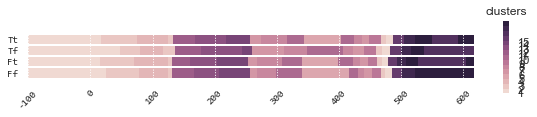

<Figure size 432x288 with 0 Axes>

In [429]:
script = {'condition': 'Tt,Tf,Ft,Ff',
          'time': '-100~600',}
res = epochs.extract(script).clustering(15)
res.plot()

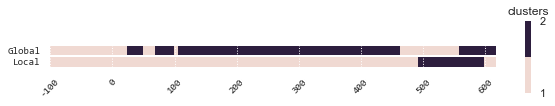

<Figure size 432x288 with 0 Axes>

In [430]:
script = {'condition': 'Global:Tt+Tf-Ft-Ff,Local:Tt+Ft-Tf-Ff',
          'time': '-100~600',}
res = epochs.extract(script).clustering(2)
res.plot()

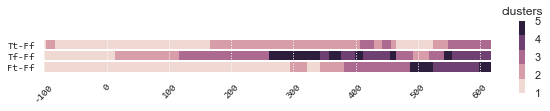

<Figure size 432x288 with 0 Axes>

In [431]:
script = {'condition': 'Tt-Ff,Tf-Ff,Ft-Ff',
          'time': '-100~600',}
res = epochs.extract(script).clustering(5)
res.plot()

## topography

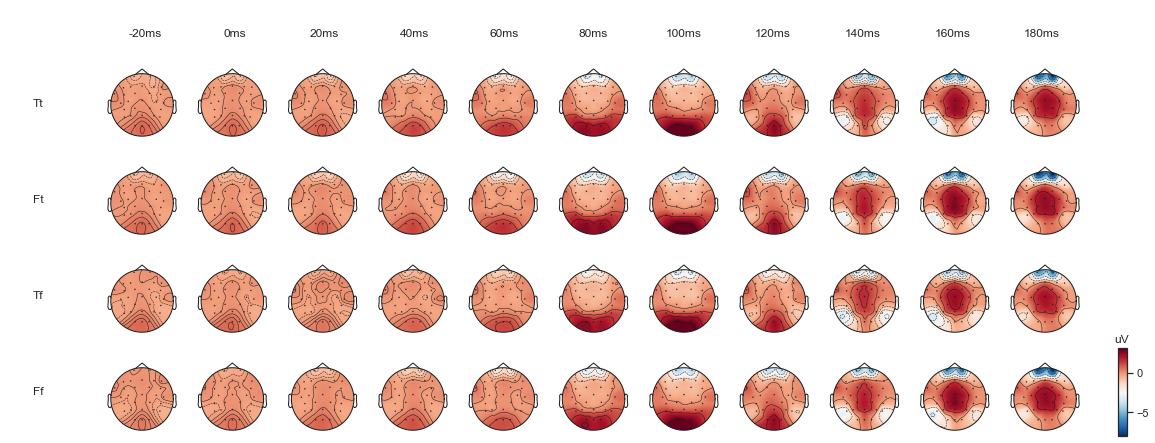

<Figure size 432x288 with 0 Axes>

In [404]:
easyEEG.reload()
script = {'condition': 'Tt,Ft,Tf,Ff',
          'time': '-20~200',}

res = epochs.extract(script).topography(win_size='20ms')
res.plot(dict(zlim=[-3,3]))

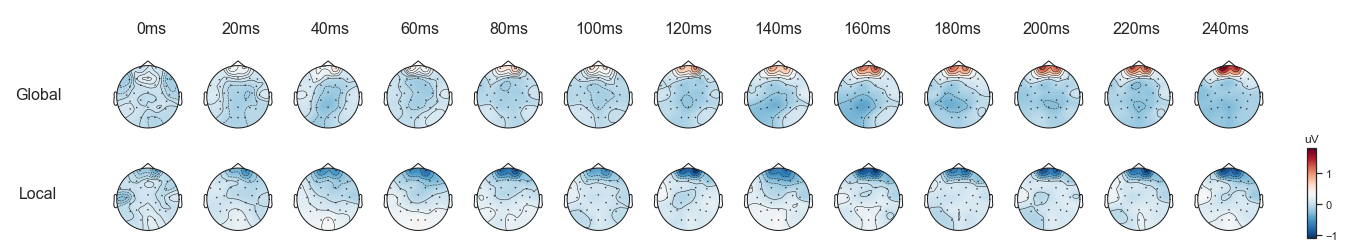

<Figure size 432x288 with 0 Axes>

In [432]:
easyEEG.reload()
script = {'condition': 'Global:Tt+Tf&Ft+Ff,Local:Tt+Ft&Tf+Ff',
          'time': '0~260',}

res = epochs.extract(script).topography(win_size='20ms')
res.plot()

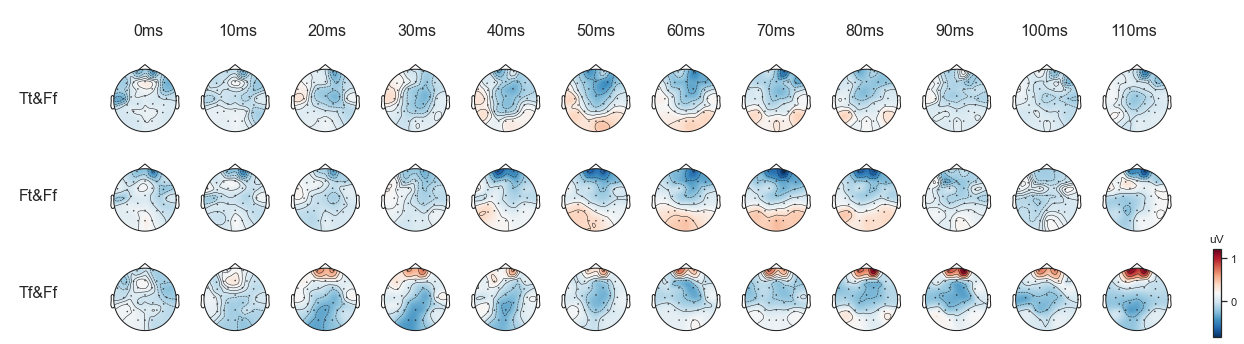

<Figure size 432x288 with 0 Axes>

In [433]:
easyEEG.reload()
script = {'condition': 'Tt&Ff,Ft&Ff,Tf&Ff',
          'time': '0~120',}

res = epochs.extract(script).topography(win_size='10ms')
res.plot()

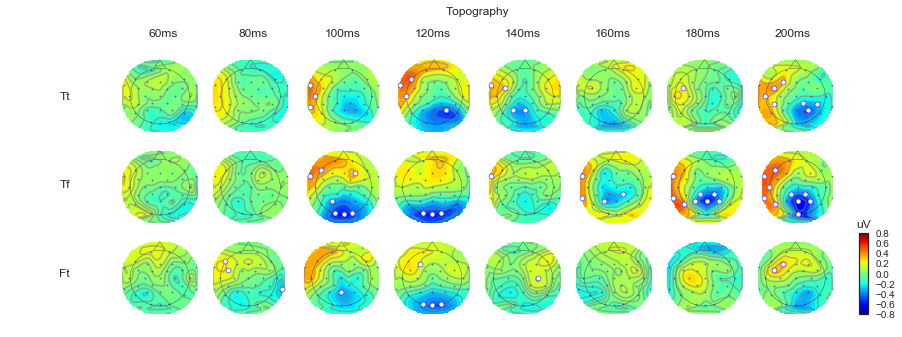

<Figure size 432x288 with 0 Axes>

In [4]:
script = {'conditions': f'Tt:{conds["Tt"]}&{conds["Ff"]},Tf:{conds["Tf"]}&{conds["Ff"]},Ft:{conds["Ft"]}&{conds["Ff"]}',
          'timepoints': '50~200'}

topo1 = epochs.extract(script).topography(win_size='20ms',)
topo1.plot(plot_params=dict(zlim=[-.8,.8]))

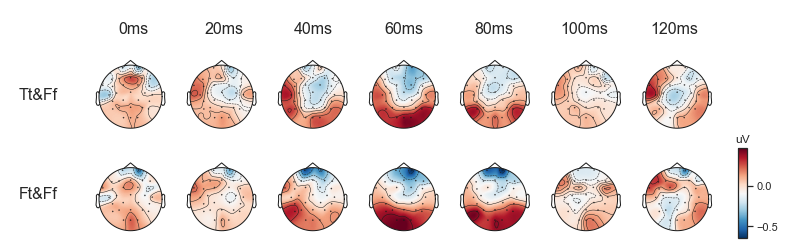

<Figure size 432x288 with 0 Axes>

In [434]:
easyEEG.reload()
script = {'condition': 'Tt&Ff,Ft&Ff',
          'time': '0~140',}

res = epochs.extract(script).topography(win_size='20ms')
res.plot()

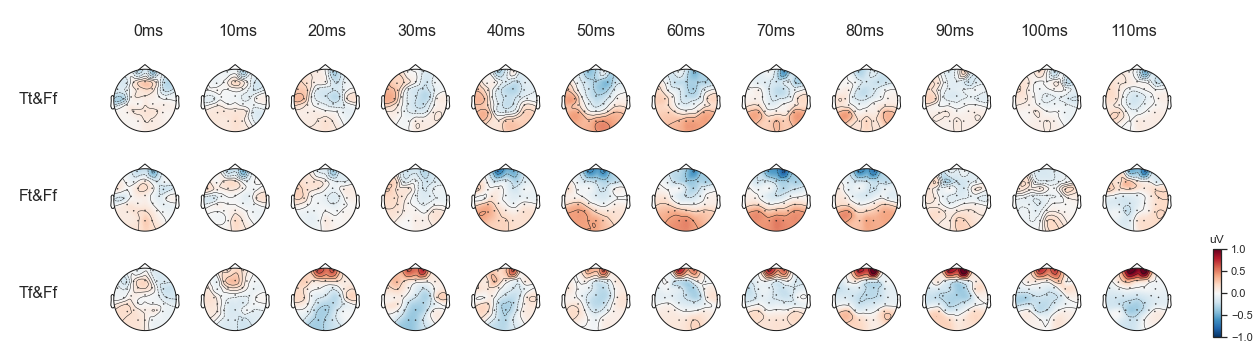

<Figure size 432x288 with 0 Axes>

In [435]:
easyEEG.reload()
script = {'condition': 'Tt&Ff,Ft&Ff,Tf&Ff',
          'time': '0~120',}

res = epochs.extract(script).topography(win_size='10ms')
res.plot(dict(zlim=(-1,1)))

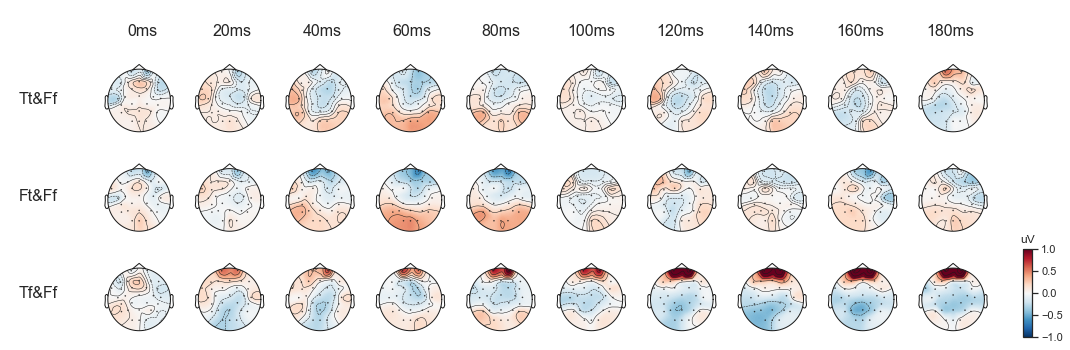

<Figure size 432x288 with 0 Axes>

In [436]:
easyEEG.reload()
script = {'condition': 'Tt&Ff,Ft&Ff,Tf&Ff',
          'time': '0~200',}

res = epochs.extract(script).topography(win_size='20ms')

res.plot(dict(zlim=(-1,1)))

In [ ]:
easyEEG.reload(easyEEG.algorithms.topo)
script = {'conditions': f'phrase:{conds["Tt"]}&{conds["Ff"]},idiom:{conds["Tf"]}&{conds["Ff"]},rand words:{conds["Ft"]}&{conds["Ff"]}',
          'timepoints': '10~160'}

topo1 = epochs.extract(script).topography(win_size='20ms',)
topo1.plot(plot_params=dict(zlim=[-.8,.8],fontsize=20,title=''))

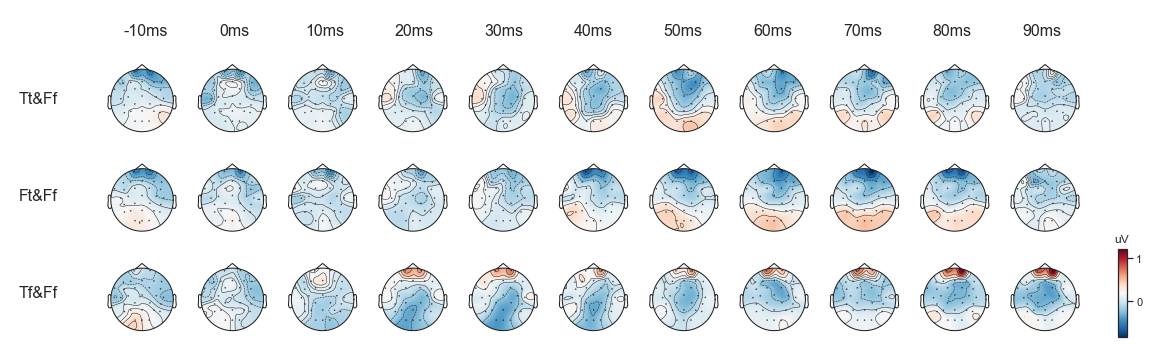

<Figure size 432x288 with 0 Axes>

In [437]:
easyEEG.reload()
script = {'condition': 'Tt&Ff,Ft&Ff,Tf&Ff',
          'time': '-10~100',}

res = epochs.extract(script).topography(win_size='10ms')
res.plot()

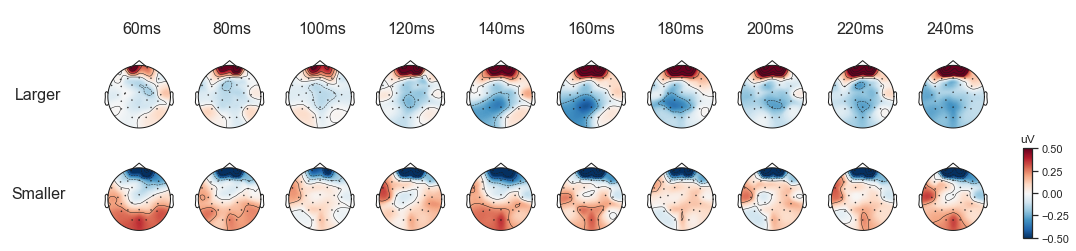

<Figure size 432x288 with 0 Axes>

In [438]:
easyEEG.reload()
script = {'condition': f'Larger:Tt+Tf&Ft+Ff,Smaller:Tt+Ft&Tf+Ff',
          'time': '60~260'}
res = epochs.extract(script).topography(win_size='20ms')
res.plot(dict(zlim=[-.5,.5]))


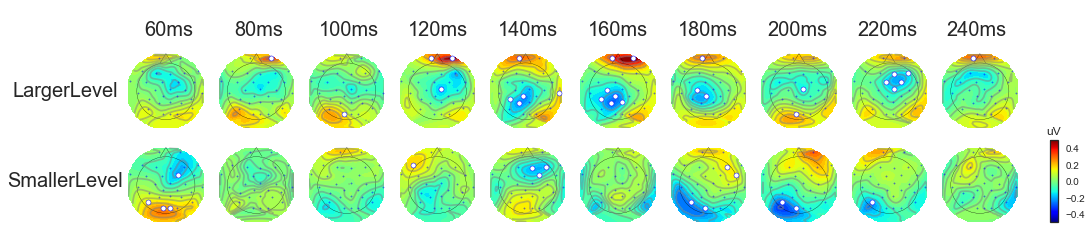

<Figure size 432x288 with 0 Axes>

In [7]:
script = {'conditions': f'LargerLevel:Tt+Tf&Ft+Ff,SmallerLevel:Tt+Ft&Tf+Ff',
          'timepoints': '50~250'}
epochs.extract(script).topography(win_size='20ms').plot(plot_params=dict(zlim=[-.5,.5],fontsize=20,title=''))


## cosine distance

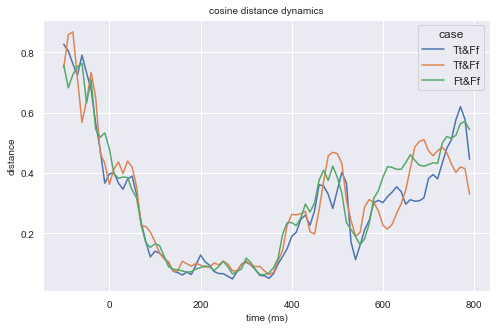

<Figure size 432x288 with 0 Axes>

In [439]:
easyEEG.reload()
script = {'condition': 'Tt&Ff,Tf&Ff,Ft&Ff',
          'time': '-100~800',}

res = epochs.extract(script).cosine_distance_dynamics(win_size='10ms')
res.plot()

# backup

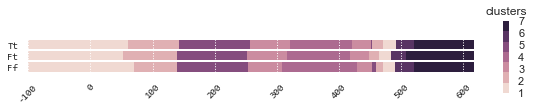

<Figure size 432x288 with 0 Axes>

In [440]:
script = {'condition': 'Tt,Ft,Ff',
          'time': '-100~600',}
res = epochs.extract(script).clustering(7)
res.plot()

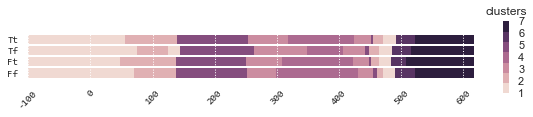

<Figure size 432x288 with 0 Axes>

In [441]:
script = {'condition': 'Tt,Tf,Ft,Ff',
          'time': '-100~600',}
res = epochs.extract(script).clustering(7)
res.plot()

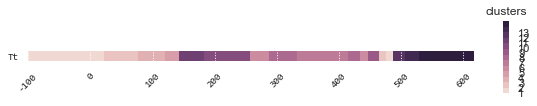

<Figure size 432x288 with 0 Axes>

In [442]:
script = {'condition': 'Tt',
          'time': '-100~600',}
res = epochs.extract(script).clustering(13)
res.plot()

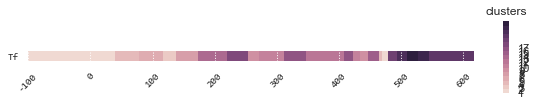

<Figure size 432x288 with 0 Axes>

In [443]:
script = {'condition': 'Tf',
          'time': '-100~600',}
res = epochs.extract(script).clustering(17)
res.plot()

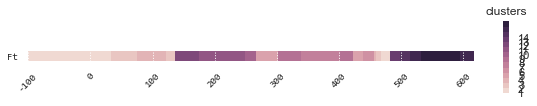

<Figure size 432x288 with 0 Axes>

In [444]:
script = {'condition': 'Ft',
          'time': '-100~600',}
res = epochs.extract(script).clustering(14)
res.plot()

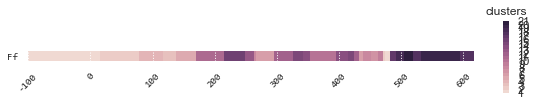

<Figure size 432x288 with 0 Axes>

In [445]:
script = {'condition': 'Ff',
          'time': '-100~600',}
res = epochs.extract(script).clustering(21)
res.plot()

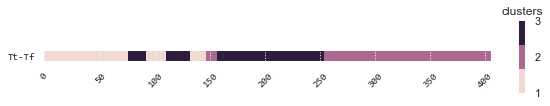

<Figure size 432x288 with 0 Axes>

In [446]:
script = {'condition': 'Tt-Tf',
          'time': '0~400',}
res = epochs.extract(script).clustering(3)
res.plot()

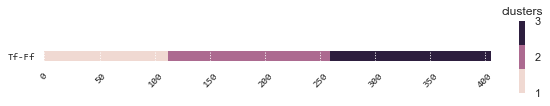

<Figure size 432x288 with 0 Axes>

In [447]:
script = {'condition': 'Tf-Ff',
          'time': '0~400',}
res = epochs.extract(script).clustering(3)
res.plot()

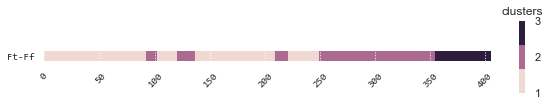

<Figure size 432x288 with 0 Axes>

In [448]:
script = {'condition': 'Ft-Ff',
          'time': '0~400',}
res = epochs.extract(script).clustering(3)
res.plot()